In [10]:
import numpy as np
import matplotlib.pyplot as plt

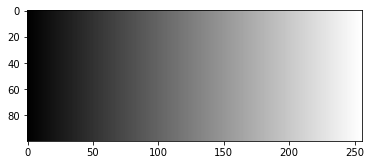

In [11]:
im = np.arange(256)
im = im[np.newaxis,:]
im = np.repeat(im,100,axis=0)
plt.imshow(im,cmap='gray')

# Processing Grayscale images

In [13]:
im = plt.imread(r'albert-einstein_gray.jpg')

In [14]:
type(im)

numpy.ndarray

In [15]:
im.shape

(949, 728)

In [16]:
im.dtype

dtype('uint8')

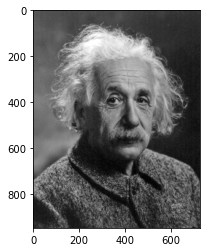

In [17]:
plt.imshow(im,cmap='gray')

In [18]:
im

array([[85, 85, 85, ..., 62, 62, 62],
       [85, 85, 85, ..., 64, 65, 64],
       [85, 85, 85, ..., 59, 59, 58],
       ...,
       [36, 42, 42, ..., 36, 42, 47],
       [29, 37, 37, ..., 36, 43, 44],
       [33, 40, 37, ..., 35, 43, 42]], dtype=uint8)

In [19]:
im[23,300]

70

In [20]:
im[23:100,40:100] = 255

ValueError: assignment destination is read-only

In [21]:
im[23,100] = 200

ValueError: assignment destination is read-only

In [22]:
im2 = im.copy()

In [23]:
im2[23,100] = 200

In [24]:
im2[23:100,40:100] = 255

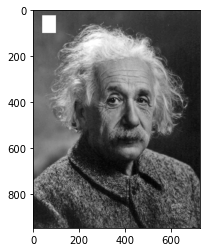

In [25]:
plt.imshow(im2,cmap='gray')

In [26]:
im2[300:400,40:100] = 0

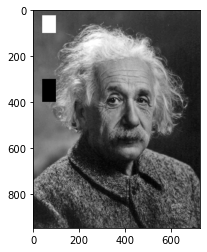

In [27]:
plt.imshow(im2,cmap='gray')

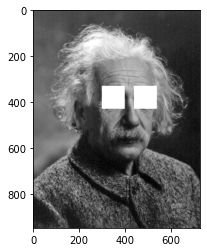

In [95]:
# Quiz Solution
im = plt.imread(r'albert-einstein_gray.jpg')
im3 = im.copy()

im3[330:430,300:400] = 255 #for left eye
im3[330:430,440:540] = 255 #for right eye

plt.imshow(im3, cmap='gray')

In [29]:
plt.imsave(r'albert-einstein_gray_modified.jpg',im2,cmap='gray')

In [30]:
# pip install opencv-contrib-python

# Grayscale Images in OpenCV

In [31]:
import cv2

In [35]:
img = cv2.imread(r'albert-einstein_gray.jpg',cv2.IMREAD_GRAYSCALE)

In [36]:
type(img)

numpy.ndarray

In [37]:
img.dtype

dtype('uint8')

In [38]:
img.shape

(949, 728)

In [39]:
img[23,100] = 200

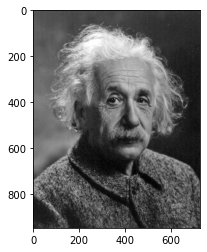

In [40]:
plt.imshow(img,cmap='gray')

In [41]:
cv2.imshow('Gray',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
img[500:700,500:600] = 255

In [43]:
cv2.imshow('Gray',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
cv2.imwrite(r'C:\Users\DeLL\Desktop\ML\CV\images\albert-einstein_gray_opencv.jpg',img)

False

# RGB Images

In [48]:
cim = plt.imread(r'tulips.jpg')

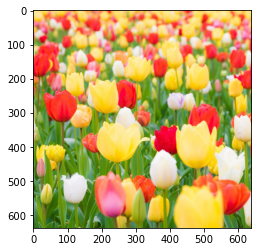

In [49]:
plt.imshow(cim)

In [50]:
cim.shape

(638, 640, 3)

In [51]:
type(cim)

numpy.ndarray

In [52]:
cim.dtype

dtype('uint8')

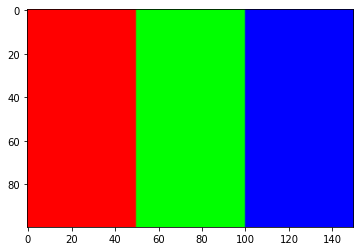

In [108]:
# Solution to Quiz 03_06
rgb = np.zeros((100,150,3), dtype='uint8')
rgb[:,0:50,0] = 255 # red
rgb[:,50:100,1] = 255 #green
rgb[:,100:150,2] = 255 #blue
 
plt.imshow(rgb)

In [109]:
cv2.imshow('RGB',rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# OpenCV reads as BGR

In [55]:
cim = cv2.imread(r'tulips.jpg')
cim = cim[:,:,::-1]
R = cim[:,:,0]
G = cim[:,:,1]
B = cim[:,:,2]

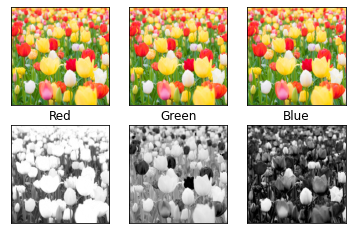

In [56]:
plt.figure(1)

plt.subplot(231)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')
plt.show()

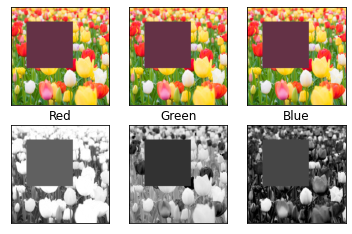

In [57]:
R[100:400,100:400] = 100
G[100:400,100:400] = 50
B[100:400,100:400] = 70
cim[:,:,0] = R
cim[:,:,1] = G
cim[:,:,2] = B

plt.figure(1)

plt.subplot(231)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')
plt.show()

# RGB to HSV conversion

In [58]:
def f_rgb_to_hsv(r, g, b,scaleFactor): 
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r, g, b)    # maximum of r, g, b 
    cmin = min(r, g, b)    # minimum of r, g, b 
    diff = cmax-cmin       # diff of cmax and cmin. 
    if cmax == cmin:  
        h = 0
    elif cmax == r:  
        h = (60 * ((g - b) / diff) + 0) % 360
    elif cmax == g: 
        h = (60 * ((b - r) / diff) + 120) % 360
    elif cmax == b: 
        h = (60 * ((r - g) / diff) + 240) % 360
   
    if h < 0:
        h = h + 360
    if cmax == 0: 
        s = 0
    else: 
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v 

In [59]:
print(f_rgb_to_hsv(100,200,50,100))

(100.0, 75.0, 78.43137254901961)


In [61]:
im = cv2.imread(r'tulips.jpg')

In [62]:
HsvIm = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
cv2.cvtColor(im,cv2.COLOR_HSV2BGR)

In [63]:
type(HsvIm)

numpy.ndarray

In [64]:
HsvIm.shape

(638, 640, 3)

In [65]:
img = cv2.imread(r'tulips.jpg')

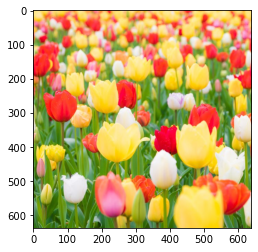

In [66]:
plt.imshow(img[:,:,::-1])

In [112]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [113]:
lr = np.array([0,120,70])
ur = np.array([8,255,255])
mask1 = cv2.inRange(hsv,lr,ur)

In [114]:
type(mask1)

numpy.ndarray

In [115]:
mask1.dtype

dtype('uint8')

In [116]:
mask1.shape

(638, 640)

In [117]:
mask1.max()

255

In [118]:
mask1.min()

0

In [119]:
lr = np.array([170,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lr,ur)

In [120]:
np.unique(mask2)

array([  0, 255], dtype=uint8)

In [121]:
np.unique(mask1)

array([  0, 255], dtype=uint8)

In [122]:
mask = mask1 | mask2

In [123]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [124]:
res = cv2.bitwise_and(img,img,mask=mask)

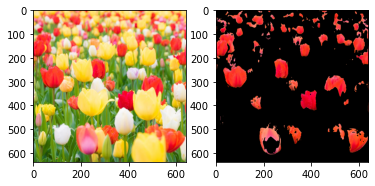

In [125]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()

In [130]:
# solution to quiz
lr = np.array([20,100,100])
ur = np.array([30,255,255])
yellow_mask = cv2.inRange(hsv,lr,ur)
res = cv2.bitwise_and(img,img,mask=yellow_mask)

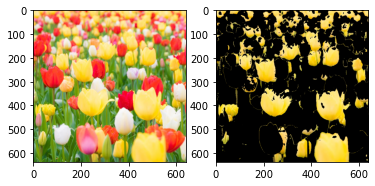

In [131]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()